In [ ]:
##Final Code for DCM

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import MNLogit
import statsmodels.api as sm
import matplotlib.pyplot as plt

# === STEP 1: Loading dataset ===
df = pd.read_excel("cleaned_restaurant_data.xlsx")

# === STEP 2: Simulating hybrid choices ===
n_individuals = 30
choices = []

# Calculating global stats for normalization
mean_quality = df["RAW_VISITOR_COUNTS"].mean() / 10
std_quality = df["RAW_VISITOR_COUNTS"].std() / 10
mean_popularity = df["RAW_VISIT_COUNTS"].mean()
std_popularity = df["RAW_VISIT_COUNTS"].std()
mean_distance = df["DISTANCE_FROM_HOME"].mean()
std_distance = df["DISTANCE_FROM_HOME"].std()
mean_dwell = df["MEDIAN_DWELL"].mean()
std_dwell = df["MEDIAN_DWELL"].std()

for i in range(n_individuals):
    for _, row in df.iterrows():
        if pd.notna(row["RAW_VISITOR_COUNTS"]) and pd.notna(row["RAW_VISIT_COUNTS"]) \
           and pd.notna(row["DISTANCE_FROM_HOME"]) and pd.notna(row["MEDIAN_DWELL"]):

            # Normalizing features for simulation
            quality = (row["RAW_VISITOR_COUNTS"] / 10 - mean_quality) / std_quality
            popularity = (row["RAW_VISIT_COUNTS"] - mean_popularity) / std_popularity
            distance = (row["DISTANCE_FROM_HOME"] - mean_distance) / std_distance
            dwell = (row["MEDIAN_DWELL"] - mean_dwell) / std_dwell

            # Utility function
            utility = 1.0 * quality + 0.5 * popularity - 1.2 * distance + dwell
            utility = np.clip(utility, -700, 700)
            prob = 1 / (1 + np.exp(-utility))

            # Hybrid logic
            if np.random.rand() < 0.6:
                choice = np.random.choice([0, 1], p=[1 - prob, prob])
            else:
                choice = np.random.choice([0, 1], p=[0.7, 0.3])  # random behavior

            choices.append({
                "individual": i,
                "restaurant": row["LOCATION_NAME"],
                "quality": quality,
                "popularity": popularity,
                "distance": distance,
                "dwell": dwell,
                "choice": choice
            })

# === STEP 3: Preparing features and label ===
choice_data = pd.DataFrame(choices)
X = choice_data[["quality", "popularity", "distance", "dwell"]]
y = choice_data["choice"]

# === STEP 4: Scaling features ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sm.add_constant(X_scaled)

# === STEP 5: Fiting the MNLogit Model ===
model = MNLogit(y, X_scaled)
result = model.fit()

# === STEP 6: Displaying results ===
print("\n Feature Importance Summary (Hybrid Model):")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.651073
         Iterations 6

 Feature Importance Summary (Hybrid Model):
                          MNLogit Regression Results                          
Dep. Variable:                 choice   No. Observations:               120000
Model:                        MNLogit   Df Residuals:                   119995
Method:                           MLE   Df Model:                            4
Date:                Sat, 10 May 2025   Pseudo R-squ.:                 0.03231
Time:                        01:43:26   Log-Likelihood:                -78129.
converged:                       True   LL-Null:                       -80737.
Covariance Type:            nonrobust   LLR p-value:                     0.000
  choice=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4166      0.006    -68.786      0.000      -0.

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2400/2400 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 4.3464e-05
Epoch 2/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 4.2078e-05
Epoch 3/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 2.3598e-05
Epoch 4/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - loss: 1.6690e-05
Epoch 5/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.8256e-05
Epoch 6/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.8359e-05
Epoch 7/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 2.0591e-05
Epoch 8/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 1.7284e-05
Epoch 9/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 9.0103e-06
Epoch 10/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.7944e-05
Epoch 11/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 1.4273e-05
Epoch 12/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1.4714e-05
Epoch 13/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - loss: 1.8435e-05
Epoch 14/50
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 20s

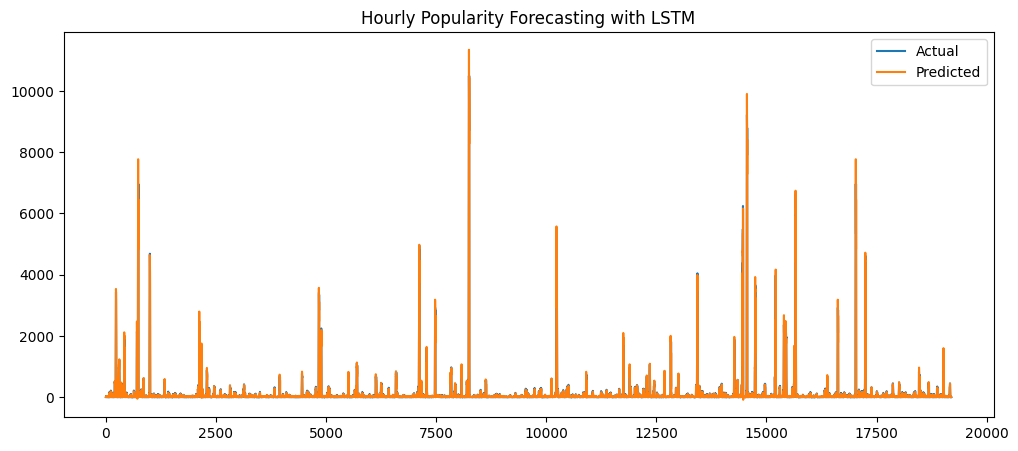

In [ ]:
##Final Code of LSTM

# STEP 1: Installing dependencies
!pip install openpyxl tensorflow

# STEP 2: Importing libraries
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# STEP 3: Loading dataset
df = pd.read_excel('cleaned_restaurant_data.xlsx')

# STEP 4: Cleaning and expanding POPULARITY_BY_HOUR
df = df.dropna(subset=['POPULARITY_BY_HOUR'])
df['POPULARITY_BY_HOUR'] = df['POPULARITY_BY_HOUR'].apply(eval)

# Flattening all popularity sequences into one long sequence
pop_seq = [hour for sublist in df['POPULARITY_BY_HOUR'] for hour in sublist]

# Normalizing data
scaler = MinMaxScaler()
pop_seq_scaled = scaler.fit_transform(np.array(pop_seq).reshape(-1, 1))

# STEP 5: Creating sequences
def create_sequences(data, time_steps=5):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(pop_seq_scaled, time_steps=5)

# STEP 6: Training/Testing Split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# STEP 7: LSTM Model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, verbose=1)

# STEP 8: Predicting and inversing scale
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Converting regression output to binary classification
threshold = np.median(y_test_inv)
y_test_class = (y_test_inv > threshold).astype(int)
y_pred_class = (y_pred_inv > threshold).astype(int)

# Confusion Matrix & Accuracy
conf_matrix = confusion_matrix(y_test_class, y_pred_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

print("Confusion Matrix:")
print(conf_matrix)

print("\n Accuracy: {:.2f}%".format(accuracy * 100))

print("\n Classification Report:")
print(classification_report(y_test_class, y_pred_class))

# STEP 9: Plotting results
plt.figure(figsize=(12, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.legend()
plt.title('Hourly Popularity Forecasting with LSTM')
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 kB 2.7 MB/s eta 0:00:00
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.97e-01 | test_loss: 2.00e-01 | reg: 3.93e+01 | : 100%|█| 800/800 [01:58<00:00,  6.74


saving model version 0.1
✅ KAN Model Accuracy: 0.9466666666666667

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       551
           1       0.94      0.90      0.92       587
           2       0.96      0.98      0.97       662

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800



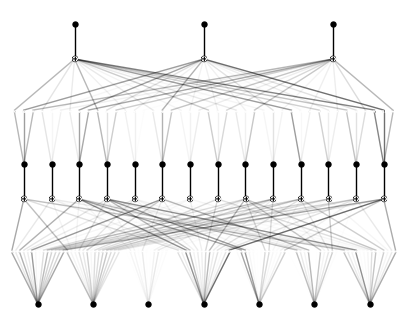

In [ ]:
####Final Code for KAN Model
##STEP 1: Install necessary packages
!pip install pykan

# STEP 2: Importing libraries
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from kan import KAN
import ast

# STEP 3: Loading dataset
df = pd.read_excel('Test_6k-cleaned_restaurant_data.xlsx')

# STEP 4: Feature Engineering from POPULARITY_BY_HOUR
df["POPULARITY_BY_HOUR"] = df["POPULARITY_BY_HOUR"].apply(ast.literal_eval)
df["hourly_mean"] = df["POPULARITY_BY_HOUR"].apply(np.mean)
df["hourly_std"] = df["POPULARITY_BY_HOUR"].apply(np.std)
df["hourly_peak"] = df["POPULARITY_BY_HOUR"].apply(lambda x: np.argmax(x))

# STEP 5: Selecting features and preparing input matrix
features = [
    "hourly_mean", "hourly_std", "hourly_peak",
    "RAW_VISITOR_COUNTS", "DISTANCE_FROM_HOME",
    "MEDIAN_DWELL", "NORMALIZED_VISITS_BY_TOTAL_VISITS"
]
X = df[features].values
y_full = df["RAW_VISIT_COUNTS"].values

# STEP 6: Training/testing split
X_train_raw, X_test_raw, y_visits_train, y_visits_test, df_train_index, df_test_index = train_test_split(
    X, y_full, df.index, test_size=0.3, random_state=42
)

# STEP 7: Creating popularity tiers from training data only
quantiles = pd.Series(y_visits_train).quantile([0.33, 0.66]).values
def assign_popularity_tier(x):
    if x <= quantiles[0]:
        return 0
    elif x <= quantiles[1]:
        return 1
    else:
        return 2

y_train = np.array([assign_popularity_tier(x) for x in y_visits_train])
y_test = np.array([assign_popularity_tier(x) for x in y_visits_test])

# STEP 8: Scaling features using training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# STEP 9: Applying SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# STEP 10: Converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
y_train_oh = F.one_hot(y_train_tensor, num_classes=3).float()

X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
y_test_oh = F.one_hot(y_test_tensor, num_classes=3).float()

# STEP 11: Computing class weights
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight("balanced", classes=classes, y=y_train_resampled)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# STEP 12: Defining weighted loss
def weighted_loss(pred, target):
    return torch.mean(class_weights_tensor * ((pred - target) ** 2))

# STEP 13: Defining and training KAN model
model = KAN(width=[7, 14, 3], grid=7, k=3, seed=42)
model.fit(
    dataset={
        'train_input': X_train_tensor,
        'train_label': y_train_oh,
        'test_input': X_test_tensor,
        'test_label': y_test_oh
    },
    opt='Adam',
    steps=800,
    lr=0.0008,
    lamb_coef=0.08,
    loss_fn=weighted_loss
)

model.plot()

# STEP 14: Evaluating model
kan_preds = torch.argmax(model.forward(X_test_tensor), dim=1).numpy()
true_labels = y_test_tensor.numpy()

print(" KAN Model Accuracy:", accuracy_score(true_labels, kan_preds))
print("\n Classification Report:\n", classification_report(true_labels, kan_preds))
